In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

plt.gray()

<Figure size 432x288 with 0 Axes>

In [2]:
def SAD_slow(first,second):
    difference = 0
    for y in range(first.shape[0]):
        for x in range(first.shape[1]):
            difference = difference + np.abs(first[x,y].astype('float')-second[x,y].astype('float'))                               
    return difference

def SAD(left_img,right_img):
     return np.sum(np.abs(np.subtract(left_img, right_img, dtype=float)))
    
def patch_matching(patch,span):
    patch_width = patch.shape[1]
    dif = np.zeros(span.shape[1]-patch_width)

    for disp in range(span.shape[1]-patch_width):
        # crop image in size of template
        # start from 0-7 end at end-7
        roi = span[:, disp:disp+patch_width]
        dif[disp] = SAD(patch,roi)

    disp_best = np.argmin(dif)
    value_min = dif[disp_best]
    return disp_best

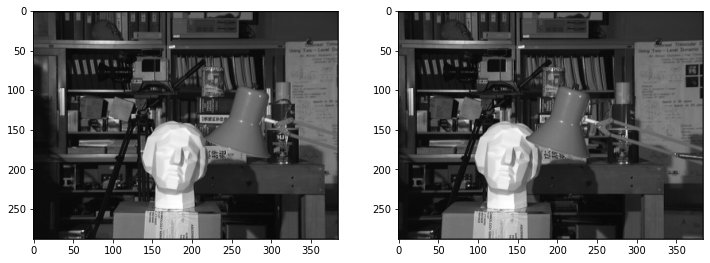

In [3]:
# import images

img_left = cv2.imread("tsukuba_left.png")
img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
img_gray_left = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)


img_right = cv2.imread("tsukuba_right.png")
img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
img_gray_right = cv2.cvtColor(img_right, cv2.COLOR_RGB2GRAY)

f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12,12))
ax_left.imshow(img_gray_left)
ax_right.imshow(img_gray_right)

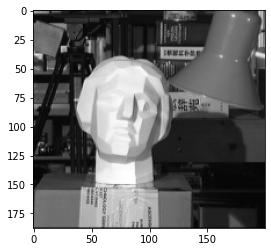

In [4]:
patch_size = 15

left = img_gray_left[100:,100:300]
plt.imshow(left)
right = img_gray_right[100:,100:300]
disp_mat = np.zeros_like(left)

for y in range(left.shape[0]-patch_size):
    # get span
    span = right[y:y+patch_size,:]
    for x in range(left.shape[1]-patch_size):
            #print(x,y)
            
            # get the patch
            patch = left[y:y+patch_size,x:x+patch_size]
            disp_mat[y,x] = patch_matching(patch,span)
            
# print(disp_mat)

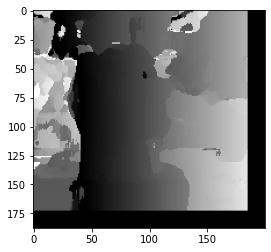

In [5]:
plt.imshow(disp_mat)